In [ ]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

%matplotlib inline

class Hood1D:
    
    def __init__(self, z=2, n=10, p=None, b=None,
                s=None, alpha=0.1, beta=0.1,
                gamma=0.5):
        self.z = z
        self.n = n
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        
        self.p = np.ones(z) if p is None else p
        self.b = np.ones(z) if b is None else b
        self.s = np.zeros(z) if s is None else s
        
        self.B = np.zeros((n, z))
        self.P = np.zeros((n, z))
        self.C = np.zeros((n, z))
        self.A = np.zeros((n, z))
        
        self.P[0] = self.p
        self.B[0] = self.b
        self.C[0] = self.alpha * b
        self.next = 1
        
    def B_i(self, b, p, i):
        sum  = 0
        for j in range(len(b)):
            sum += pi_ij(p, j)[i] * b[j]
        return sum
        
    def arrests(self, b, p):
        return self.beta * p * b
    
    def step(self):
        t = self.next
        B_t = [self.B_i(self.B[t-1], self.P[t-1], i) for i in range(z)]\
                - self.arrests(self.B[t-1], self.P[t-1]) + self.s
        self.B[i] = B_t
        self.P[i] = self.p + self.gamma * self.C[i-1]
        self.C[i] = self.alpha * B_t
        self.A[i] = self.arrests(self.B[i-1], self.P[i-1])
        
        self.next += 1
        
    def loop(self):
        for i in range(self.n - 1):
            self.step()
            
    def draw(self):
        a = self.B
        plt.imshow(a, cmap='plasma', alpha=0.7)
        plt.xticks([])
        plt.yticks([])
        

In [1]:
import numpy as np

In [6]:
def pi_ij(p, i):
    x = p[i] - p
    print(x)
    x = np.exp(x)
    print(x)
    x = x / x.sum()
    return x
    
    

In [7]:
p = np.array([1, 0, 4, 3])
pi_ij(p, 3)

[ 2  3 -1  0]
[ 7.3890561  20.08553692  0.36787944  1.        ]


array([0.25618664, 0.69638749, 0.01275478, 0.03467109])

In [28]:
np.exp(2)+np.exp(3)+np.exp(-1)+np.exp(0)

28.842472463289763

In [30]:
np.exp(2) / 28.842472463289763

0.25618663962790716

In [8]:
pi_ij(p, 2)

[3 4 0 1]
[20.08553692 54.59815003  1.          2.71828183]


array([0.25618664, 0.69638749, 0.01275478, 0.03467109])

In [9]:
pi_ij(p, 1)

[-1  0 -4 -3]
[0.36787944 1.         0.01831564 0.04978707]


array([0.25618664, 0.69638749, 0.01275478, 0.03467109])

In [25]:
pi_ij(p, 0)

[ 0  1 -3 -2]
[1.         2.71828183 0.04978707 0.13533528]


array([0.25618664, 0.69638749, 0.01275478, 0.03467109])

In [11]:
3 - p

array([ 2,  3, -1,  0])

In [12]:
np.exp(3-p)

array([ 7.3890561 , 20.08553692,  0.36787944,  1.        ])

In [13]:
x = sum(np.exp(3-p))

In [14]:
x

28.842472463289763

In [15]:
7.3890561 / x

0.2561866396649827

In [18]:
x = sum(np.exp(3-p))

In [21]:
x = np.exp(0-p)

In [22]:
x

array([0.36787944, 1.        , 0.01831564, 0.04978707])

In [23]:
sum = x.sum()

In [24]:
x / sum

array([0.25618664, 0.69638749, 0.01275478, 0.03467109])

In [31]:
p

array([1, 0, 4, 3])

In [32]:
pi_ij(p, 2)

[3 4 0 1]
[20.08553692 54.59815003  1.          2.71828183]


array([0.25618664, 0.69638749, 0.01275478, 0.03467109])

In [33]:
pi_ij(p, 0)

[ 0  1 -3 -2]
[1.         2.71828183 0.04978707 0.13533528]


array([0.25618664, 0.69638749, 0.01275478, 0.03467109])

In [ ]:
def pi_ij(p, i, j):
    x = p[i] - p
    print(x)
    x = np.exp(x)
    print(x)
    x = x / x.sum()
    return x

In [34]:
p

array([1, 0, 4, 3])

In [45]:
np.log(1 + np.exp(0))

0.6931471805599453

In [46]:
np.log(1 + np.exp(1))

1.3132616875182228

In [47]:
np.log(1 + np.exp(-3))

0.04858735157374196

In [48]:
np.log(1 + np.exp(-2))

0.1269280110429726

In [41]:
x = np.array([2.1269280110429727, 3.048587351573742, 0.31326168751822286, 0.6931471805599453])

In [49]:
y = x / x.sum()

In [50]:
y

array([0.34405598, 0.49314538, 0.05067382, 0.11212483])

In [51]:
z = np.array([0.6931471805599453, 1.3132616875182228, 0.04858735157374196, 0.1269280110429726])

In [52]:
z / z.sum()

array([0.31767702, 0.60188235, 0.02226812, 0.05817251])

In [65]:
def pi_ij(p, i, j):
    x = np.log(1 + np.exp(p[i] - p[j]))
    sum = 0
    for ind in range(len(p)):
        sum += np.log(1 + np.exp(p[i] - p[ind]))
    return x / sum
        

In [66]:
p

array([1, 0, 4, 3])

In [67]:
pi_ij(p, 2, 1)

0.44286181028772337

In [72]:
p

array([1, 0, 4, 3])

In [71]:
[pi_ij(p, 3, z) for z in range(len(p))]

[0.34405598187085745,
 0.49314537639214384,
 0.05067381543804696,
 0.11212482629895186]

In [73]:
[pi_ij(p, 0, z) for z in range(len(p))]

[0.31767701683169675,
 0.6018823518449975,
 0.02226812044626693,
 0.05817251087703881]

In [74]:
[pi_ij(p, 1, z) for z in range(len(p))]

[0.29190962314652574,
 0.6459019418088281,
 0.01691282027048475,
 0.04527561477416136]

In [75]:
def pi_ij(p, i):
    x = np.log(1 + np.exp(p[i] - p))
    return x / x.sum()

In [85]:
pi_ij(p, 3).sum()

1.0000000000000002

In [86]:
p

array([1, 0, 4, 3])

In [87]:
b = np.array([2, 6, 1, 0])

In [88]:
def b_i(b, p, i):
    sum  = 0
    for j in range(len(b)):
        sum += pi_ij(p, j)[i] * b[j]
    return sum

In [89]:
b_i(b, p, 0)

2.7228129018079814

In [90]:
b_i(b, p, 1)

5.522038164830687

In [91]:
b_i(b, p, 2)

0.22240862328354732

In [92]:
b_i(b, p, 3)

0.5327403100777841

In [95]:
np.array([b_i(b, p, j) for j in range(len(b))])

array([2.7228129 , 5.52203816, 0.22240862, 0.53274031])

In [97]:
b = [20, 3, 1, 5]
s = np.array([b_i(b, p, j) for j in range(len(b))])

In [98]:
s.sum()

29.0

In [99]:
s

array([ 9.28555024, 16.88394155,  0.82586541,  2.00464279])

In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt

%matplotlib inline

class Hood1D:
    
    def __init__(self, z=2, n=10, p=None, b=None,
                s=None, alpha=0.1, beta=0.1,
                gamma=0.5):
        self.z = z
        self.n = n
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        
        self.p = np.ones(z) if p is None else p
        self.b = np.ones(z) if b is None else b
        self.s = np.zeros(z) if s is None else s
        
        self.B = np.zeros((n, z))
        self.P = np.zeros((n, z))
        self.C = np.zeros((n, z))
        self.A = np.zeros((n, z))
        
        self.P[0] = self.p
        self.B[0] = self.b
        self.C[0] = self.alpha * self.b
        self.next = 1
        
    def pi_ij(self, p, i):
        x = np.log(1 + np.exp(p[i] - p))
        return x / x.sum()
        
    def B_i(self, b, p, i):
        sum  = 0
        for j in range(len(b)):
            sum += self.pi_ij(p, j)[i] * b[j]
        return sum
        
    def arrests(self, b, p):
        return self.beta * p * b
    
    def step(self):
        t = self.next
        p_ = self.P[t-1]
        b_ = self.B[t-1]
        B_t = np.array([self.B_i(b_, p_, i) for i in range(self.z)]) - self.arrests(b_, p_) + self.s
        self.B[t] = B_t
        self.P[t] = self.p + self.gamma * self.C[t-1]
        self.C[t] = self.alpha * B_t
        self.A[t] = self.arrests(b_, p_)
        
        self.next += 1
        
    def loop(self):
        for i in range(self.n - 1):
            self.step()
            
    def draw(self):
        a = self.B
        plt.imshow(a, cmap='plasma', alpha=0.7)
        plt.xticks([])
        plt.yticks([])
        

In [143]:
rnd = np.random.RandomState(42)

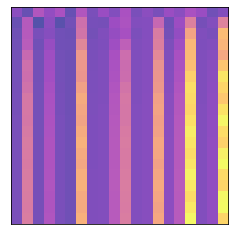

In [144]:
def pi_ij(p, i):
    x = np.log(1 + np.exp(p[i] - p))
    return x / x.sum()

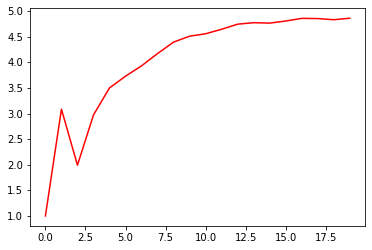

In [145]:
seq18 = hood.B[:, 18]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq18)), seq18, color='red')

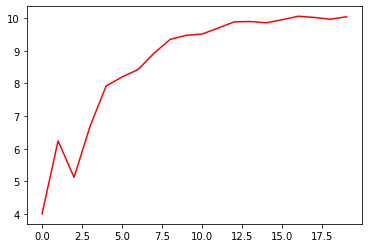

In [146]:
seq15 = hood.B[:, 15]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq15)), seq15, color='red')

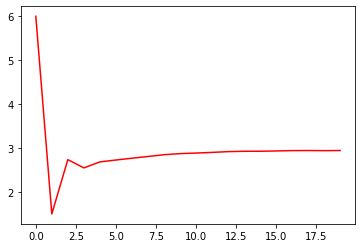

In [147]:
seq8= hood.B[:, 8]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq8)), seq8, color='red')

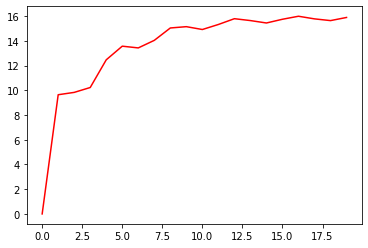

In [151]:
seq1= hood.B[:, 1]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq1)), seq1, color='red')

In [148]:
hood.B[0] - hood.B[-1]

array([  2.078563  , -15.88423662,   7.47909154,  -3.80678791,
         6.078563  ,  -0.80464438, -15.46649676,  -0.62688812,
         3.05801205,  -7.04320593,  -7.89339572,  -0.94198795,
         0.34911422, -21.15596854,   1.81075405,  -6.0431916 ,
       -25.41405042,   3.05801205,  -3.8620385 , -26.42004384])

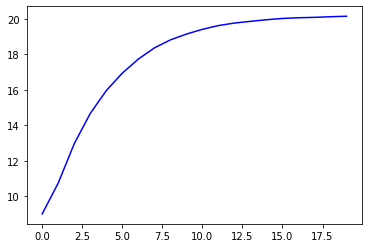

In [149]:
# overall crime
crime = hood.C.sum(axis=1)
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(crime)), crime, color='blue')

In [152]:
hood.s

array([0, 3, 1, 1, 0, 1, 4, 1, 3, 3, 3, 3, 4, 2, 0, 3, 1, 3, 1, 1])

In [10]:
hood2 = Hood1D()

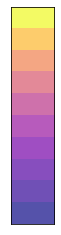

In [11]:
hood2.loop()
hood2.draw()

In [12]:
hood2.B

array([[1.        , 1.        ],
       [0.9       , 0.9       ],
       [0.8055    , 0.8055    ],
       [0.72132525, 0.72132525],
       [0.64628759, 0.64628759],
       [0.57932791, 0.57932791],
       [0.51952306, 0.51952306],
       [0.46606588, 0.46606588],
       [0.41824863, 0.41824863],
       [0.37544911, 0.37544911]])

In [13]:
hood2.A

array([[0.        , 0.        ],
       [0.1       , 0.1       ],
       [0.0945    , 0.0945    ],
       [0.08417475, 0.08417475],
       [0.07503766, 0.07503766],
       [0.06695968, 0.06695968],
       [0.05980485, 0.05980485],
       [0.05345718, 0.05345718],
       [0.04781725, 0.04781725],
       [0.04279952, 0.04279952]])

In [15]:
hood2.B[:-1] - hood2.A[1:]

array([[0.9       , 0.9       ],
       [0.8055    , 0.8055    ],
       [0.72132525, 0.72132525],
       [0.64628759, 0.64628759],
       [0.57932791, 0.57932791],
       [0.51952306, 0.51952306],
       [0.46606588, 0.46606588],
       [0.41824863, 0.41824863],
       [0.37544911, 0.37544911]])

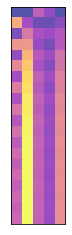

In [7]:
p = np.array([8, 1, 3, 4, 2])
b = np.array([0, 0, 4, 2, 0])
s = np.array([8, 0, 1, 1, 0])
hood2 = Hood1D(5, 20, p, b, s, alpha=.1, beta=.11, gamma=0.5)
hood2.loop()
hood2.draw()

In [40]:
hood2.B[:, 0]

array([0.        , 8.01107337, 1.84595936, 6.51611653, 2.94740242,
       5.65524056, 3.59462492, 5.15924855, 3.9714561 , 4.87357463,
       4.18958493, 4.70908111, 4.31542228, 4.61439015, 4.38788857,
       4.55988695, 4.42958302, 4.52851901, 4.453562  , 4.51046713])

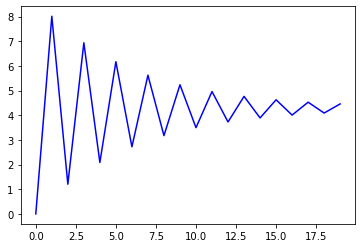

In [51]:
seq0 = hood2.B[:, 0]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq0)), seq0, color='blue')

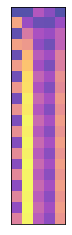

In [114]:
p = np.array([9, 1, 3, 4, 2])
b = np.array([0, 0, 4, 2, 0])
s = np.array([9, 0, 1, 1, 1])
hood2 = Hood1D(5, 20, p, b, s, beta=.11)
hood2.loop()
hood2.draw()

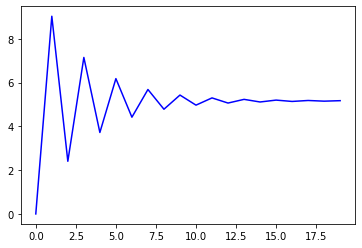

In [92]:
seq0 = hood2.B[:, 0]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq0)), seq0, color='blue')

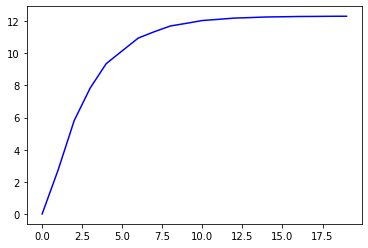

In [93]:
seq1 = hood2.B[:, 1]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq1)), seq1, color='blue')

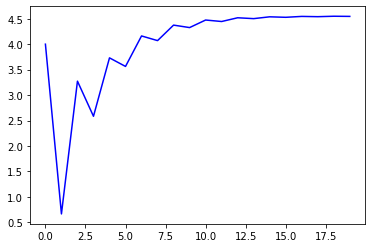

In [94]:
seq2 = hood2.B[:, 2]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq2)), seq2, color='blue')

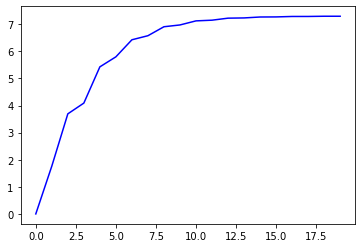

In [95]:
seq4 = hood2.B[:, 4]
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(seq4)), seq4, color='blue')

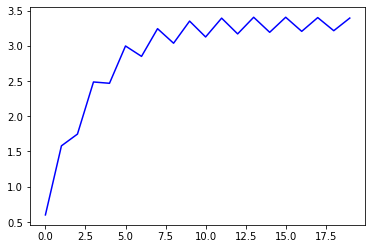

In [116]:
crime = hood2.C.sum(axis=1)
fig = plt.figure()
ax = plt.axes()
ax.plot(range(len(crime)), crime, color='blue')

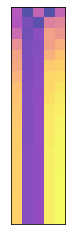

In [112]:
p = np.array([1, 4, 4, 1, 1])
b = np.array([5, 0, 6, 0, 6])
s = np.array([0, 1, 2, 3, 4])
hood2 = Hood1D(5, 20, p, b, s, beta=.1)
hood2.loop()
hood2.draw()